# Análise exploratória de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Coleta de Dados

In [3]:
titanic = sns.load_dataset('titanic')
titanic.to_csv('../data/raw/data.csv', index=False)

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Dicionário de dados

In [5]:
dicionario= pd.DataFrame([
    {"variavel": "survived",
     "descricao":"Informa se sobreviveu ou não aou naufragio. 0=nao 1=sim",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "pclass",
     "descricao": "Classe do passageiro. 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe",
     "tipo": "qualitativa",
     "subtipo": "ordinal"},
    
    {"variavel": "sex",
     "descricao": "Sexo do passageiro. male=masculino, female=feminino",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "age",
     "descricao": "Idade do passageiro",
     "tipo": "quantitativa",
     "subtipo": "discreta"},
    
    {"variavel": "sibsp",
     "descricao": "Número de irmãos e/ou companheiro abordo",
     "tipo": "quantitativa",
     "subtipo": "discreta"},
    
    {"variavel": "parch",
     "descricao": "Número de pais e/ou filhos abordo",
     "tipo": "quantitativa",
     "subtipo": "discreta"},
    
    {"variavel": "fare",
     "descricao": "Valor pago pela passagem",
     "tipo": "quantitativa",
     "subtipo": "continua"},
    
    {"variavel": "embarked",
     "descricao": "Nome do porto onde embarcou",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "class",
     "descricao": "Equivalente ao pclass. 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe",
     "tipo": "qualitativa",
     "subtipo": "ordinal"},
    
    {"variavel": "who",
     "descricao": "Categoria do passageiro. Homem, mulher ou criança",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "adult_male",
     "descricao": "Verifica se o passageiro é um homem adulto ou não. False=nao True=sim",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "deck",
     "descricao": "Área onde a cabine do passageiro está localizada",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "embark_town",
     "descricao": "Cidade onde o passageiro embarcou",
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "alive",
     "descricao": "Verifica se o passageiro sobreviveu ou não. False=nao True=sim", 
     "tipo": "qualitativa",
     "subtipo": "nominal"},
    
    {"variavel": "alone",
     "descricao": "Verifica se o passageiro estava sozinho no navio ou não. False=nao True=sim",
     "tipo": "qualitativa",
     "subtipo": "nominal"}])

In [6]:
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Informa se sobreviveu ou não aou naufragio. 0=...,qualitativa,nominal
1,pclass,"Classe do passageiro. 1 = 1ª classe, 2 = 2ª cl...",qualitativa,ordinal
2,sex,"Sexo do passageiro. male=masculino, female=fem...",qualitativa,nominal
3,age,Idade do passageiro,quantitativa,discreta
4,sibsp,Número de irmãos e/ou companheiro abordo,quantitativa,discreta
5,parch,Número de pais e/ou filhos abordo,quantitativa,discreta
6,fare,Valor pago pela passagem,quantitativa,continua
7,embarked,Nome do porto onde embarcou,qualitativa,nominal
8,class,"Equivalente ao pclass. 1 = 1ª classe, 2 = 2ª c...",qualitativa,ordinal
9,who,"Categoria do passageiro. Homem, mulher ou criança",qualitativa,nominal


In [7]:
qualitativas=dicionario[dicionario['tipo']=='qualitativa'].variavel.tolist()
quantitativas=dicionario[dicionario['tipo']=='quantitativa'].variavel.tolist()

In [8]:
quantitativas

['age', 'sibsp', 'parch', 'fare']

In [9]:
qualitativas

['survived',
 'pclass',
 'sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
dicionario.to_csv('../data/external/dicionario.csv', index=False)

## 2. Perguntas de partida e hipóteses

In [53]:
#1- Será que tem alguma relação entre estar sozinho e mais chances de morrer? Quantas pessoas que estavam 
#embarcadas sozinha morreram? FEITO
#2- Será que tem algum relação entre as mortes e área onde a cabine estava localizada no navio? Será que teve 
#alguma área privilegiada com botes salva-vidas? Qual a taxa de mortalidade por área onde as cabines do navio 
#estavam? NÃO CONSEGUI
#3- Qual foi o porto que mais passageiros embarcaram? FEITO
#4- Qual a taxa de homens, mulheres e crianças a bordo? FEITO
#5- Crianças e mulheres tiveram preferência em pegar os botes salva-vidas? Qual a taxa de mortalidade entre 
#homens, mulheres e crianças? FEITO
#6- Será que alguma das classes teve privilegios para usar os botes salva-vidas? Qual a taxa de mortalidade
#entre as classes? FEITO
#7- Qual a taxa de passageiros por classes? FEITO
#8- Quais as idades dos passageiros? Qual era a faixa etária do público do navio? FEITO
#9- Qual a relação entre classes e idades? FEITO


## 3. Insights

In [12]:
from matplotlib import pyplot as plt
import seaborn as sb

/home/sarah/.cache/pypoetry/virtualenvs/src-jdTou4Wx-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

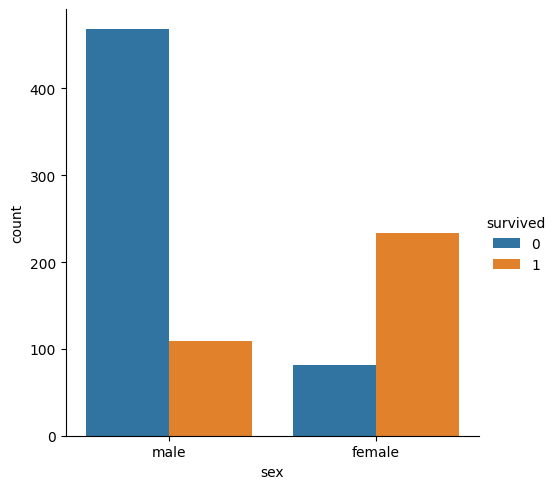

In [18]:
#Quero alterar as cores e talvez colocar as legendas em português. Ainda não sei como.
plt.figure(figsize=(4,4))
sb.catplot(x='sex', hue='survived', kind= "count", data=titanic)
plt.show()

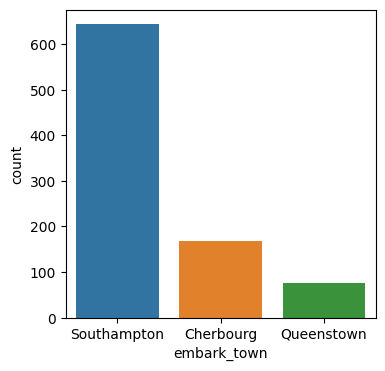

In [14]:
plt.figure(figsize=(4,4))
sb.countplot(x='embark_town', data=titanic)
plt.show()

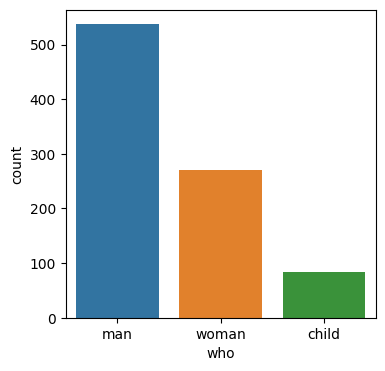

In [15]:
plt.figure(figsize=(4,4))
sb.countplot(x='who', data=titanic)
plt.show()

/home/sarah/.cache/pypoetry/virtualenvs/src-jdTou4Wx-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

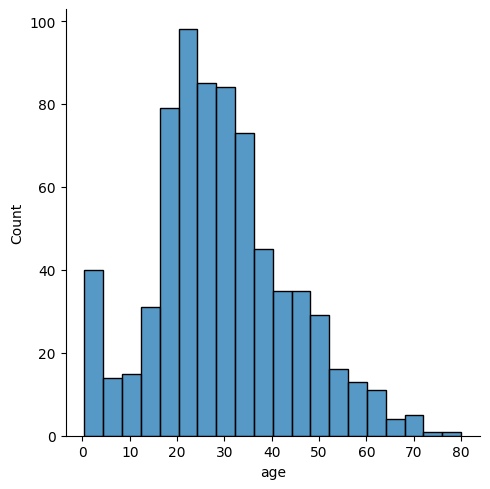

In [16]:
plt.figure(figsize=(8,8))
sb.displot(titanic['age'])
plt.show()

/home/sarah/.cache/pypoetry/virtualenvs/src-jdTou4Wx-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


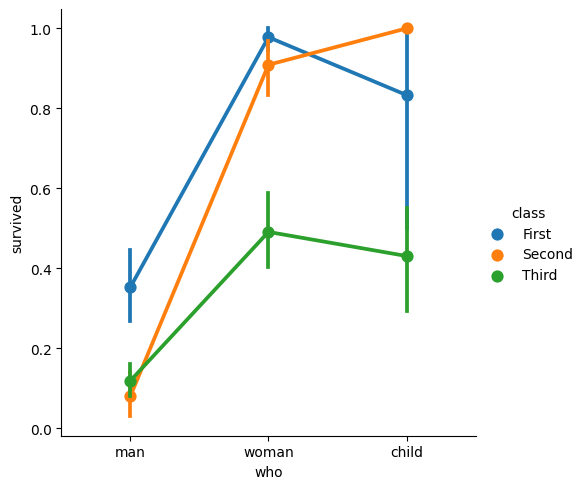

In [20]:
sns.catplot(data=titanic, x="who", y="survived", hue="class", kind="point")

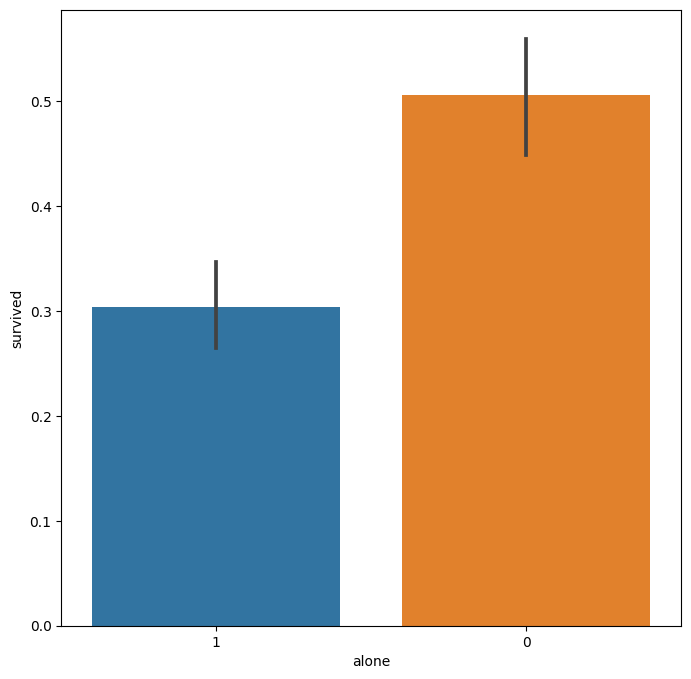

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x='alone', y='survived', data=titanic, order=[1,0])
plt.show()

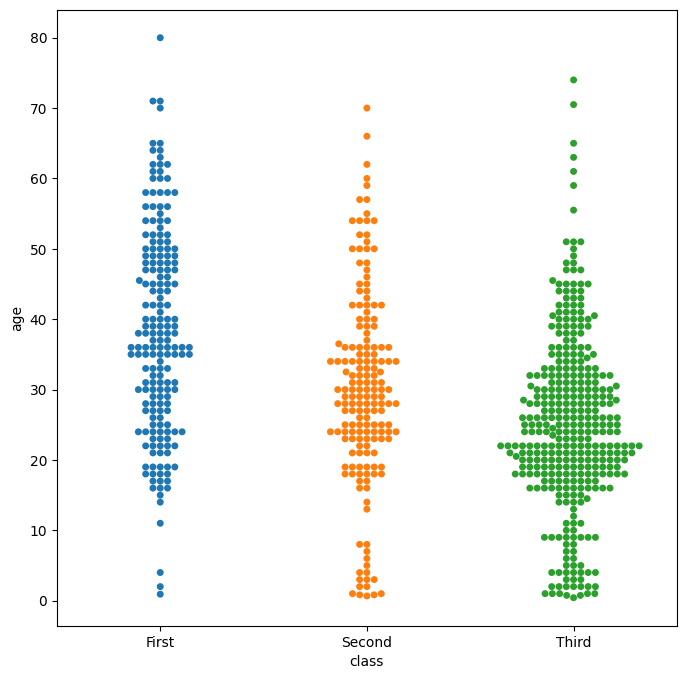

In [37]:
plt.figure(figsize=(8,8))
sb.swarmplot(x='class', y='age', data=titanic)
plt.show()

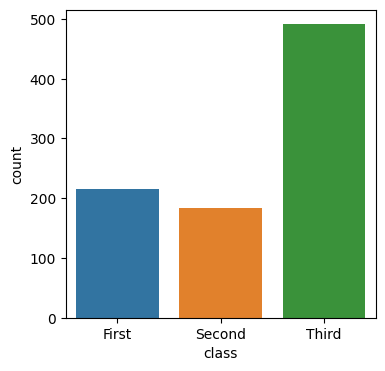

In [38]:
plt.figure(figsize=(4,4))
sb.countplot(x='class', data=titanic)
plt.show()